In [1]:
import numpy as np
import pickle


In [2]:
# project-based method with gc
all_seeds = [0, 10, 123, 231, 321]

all_results = []
for seed in all_seeds:
    fn = 'exp3_results/exp3_unlearn_gc_20_39323.000000_seed%d.pkl'%seed
    with open(fn, 'rb') as f:
        results = pickle.load(f)
        all_results.append(results)
        
all_results = np.array(all_results)
projector_gc_mean = np.mean(all_results, axis=0)
projector_gc_stds = np.std(all_results, axis=0)

# project-based method
all_seeds = [0, 10, 123, 231, 321]

all_results = []
for seed in all_seeds:
    fn = 'exp3_results/exp3_unlearn_20_39323.000000_seed%d.pkl'%seed
    with open(fn, 'rb') as f:
        results = pickle.load(f)
        all_results.append(results)
        
all_results = np.array(all_results)
projector_mean = np.mean(all_results, axis=0)
projector_stds = np.std(all_results, axis=0)


# GraphSaint method
all_seeds = [0, 10, 123, 231, 321]

all_results = []
for seed in all_seeds:
    fn = 'exp3_results/exp3_retrain_graphsaint_20_39323.000000_seed%d.pkl'%seed
    with open(fn, 'rb') as f:
        results = pickle.load(f)
        all_results.append(results)
        
all_results = np.array(all_results)
graphsaint_mean = np.mean(all_results, axis=0)
graphsaint_stds = np.std(all_results, axis=0)


# GAT method
all_seeds = [0, 10, 123, 231, 321]

all_results = []
for seed in all_seeds:
    fn = 'exp3_results/exp3_retrain_gat_20_39323.000000_seed%d.pkl'%seed
    with open(fn, 'rb') as f:
        results = pickle.load(f)
        all_results.append(results)
        
all_results = np.array(all_results)
gat_mean = np.mean(all_results, axis=0)
gat_stds = np.std(all_results, axis=0)

# GraphSAGE method
all_seeds = [0, 10, 123, 231, 321]

all_results = []
for seed in all_seeds:
    fn = 'exp3_results/exp3_retrain_graphsage_20_39323.000000_seed%d.pkl'%seed
    with open(fn, 'rb') as f:
        results = pickle.load(f)
        all_results.append(results)
        
all_results = np.array(all_results)
graphsage_mean = np.mean(all_results, axis=0)
graphsage_stds = np.std(all_results, axis=0)

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif" 
plt.rcParams["figure.figsize"] = (6,2.5)

SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

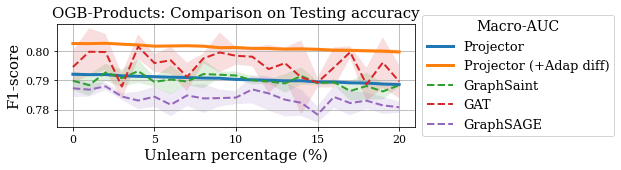

In [4]:
DATASET = 'OGB-Products'

fig, axs = plt.subplots()
######################################

y_mean = projector_mean[:, -1]
y_std  = projector_stds[:, -1]
x_axis = np.arange(len(y_mean))

axs.plot(x_axis, y_mean, linewidth=3, linestyle='-', label='Projector')
axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.15)

######################################

y_mean = projector_gc_mean[:, -1] 
y_std  = projector_gc_stds[:, -1] 
x_axis = np.arange(len(y_mean))

axs.plot(x_axis, y_mean, linewidth=3, linestyle='-', label='Projector (+Adap diff)')
axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.15)
######################################

y_mean = graphsaint_mean[:, -1]
y_std  = graphsaint_stds[:, -1]
x_axis = np.arange(len(y_mean))

axs.plot(x_axis, y_mean, linewidth=2, linestyle='--', label='GraphSaint')
axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.15)

######################################

y_mean = gat_mean[:, -1]
y_std  = gat_stds[:, -1]
x_axis = np.arange(len(y_mean))

axs.plot(x_axis, y_mean, linewidth=2, linestyle='--', label='GAT')
axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.15)

######################################
y_mean = graphsage_mean[:, -1]
y_std  = graphsage_stds[:, -1]
x_axis = np.arange(len(y_mean))

axs.plot(x_axis, y_mean, linewidth=2, linestyle='--', label='GraphSAGE')
axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.15)


######################################
plt.title('%s: Comparison on Testing accuracy'%DATASET, fontsize=15)
axs.set_ylabel('F1-score', fontsize=15)
axs.set_xlabel('Unlearn percentage (%)', fontsize=15)
axs.xaxis.get_major_locator().set_params(integer=True)
axs.grid(True)
fig.tight_layout()
axs.legend(fontsize=13)

legend = axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Macro-AUC', fontsize=13)
plt.setp(legend.get_title(),fontsize=14)

plt.savefig('%s_test_perform.pdf'%DATASET, bbox_inches='tight')